# Laboratorio 2: Redes Neuronales a Keras y TensorFlow

Este laboratorio cubre el inicio de cómo realizar redes neuronales con Keras y TensorFlow

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1. Ejemplo de clasificación con MLP - Multi-Layer Perceptron

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Generando datos
num_muestras = 1000
num_variables = 20
num_clases = 3

# Variables
X = np.random.rand(num_muestras, num_variables)
# Etiquetas
y = np.random.randint(num_clases, size=num_muestras)
print("Formato original de y:", y[:10])

# Formato categórico
y = keras.utils.to_categorical(y, num_clases)
print("Nuevo formato y:", y[:10,:])

# Separación de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print(len(y_train), len(y_val), len(y_test))

Formato original de y: [0 0 1 0 0 0 2 0 1 1]
Nuevo formato y: [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
700 150 150


¿Qué hace keras.utils.to_categorical? ¿Por qué es necesario?

Modelo: de 2 *hidden layers* con 64 unidades y una última con 3 unidades y activación softmax.

Utilizamos optimizador adam con función de pérdida categorical crossentropy y monitoreamos la precisión.

Entrenamos 20 veces/epochs con un batch de 32 datos

In [3]:
# Build the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(num_variables,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_clases, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', # descendiente de gradiente estocástico
              loss='categorical_crossentropy', # entropia cruzada categórica (mas de dos clases)
              metrics=['accuracy']) # % de clasificaciones correctas (en cada periodo nos muestre este valor )

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3010 - loss: 1.1142 - val_accuracy: 0.2667 - val_loss: 1.1097
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3490 - loss: 1.0999 - val_accuracy: 0.3067 - val_loss: 1.1075
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3495 - loss: 1.0999 - val_accuracy: 0.3533 - val_loss: 1.1071
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3584 - loss: 1.0988 - val_accuracy: 0.3467 - val_loss: 1.1071
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3436 - loss: 1.1028 - val_accuracy: 0.3467 - val_loss: 1.1066
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3557 - loss: 1.0960 - val_accuracy: 0.3267 - val_loss: 1.1082
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3448 - loss: 1.0998 - val_accuracy: 0.3133 - val_loss: 1.1089
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3679 - loss: 1.0943 - val_accuracy: 0.32

Estudio del proceso de entrenamiento

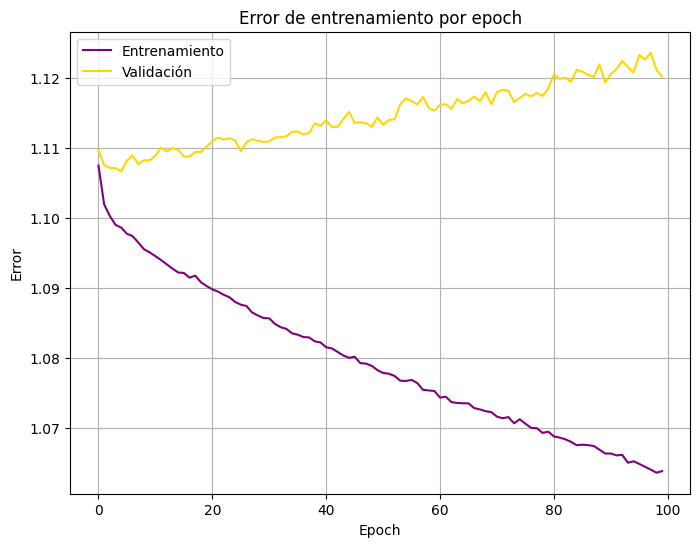

In [4]:
# Access training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(train_loss,  label='Entrenamiento', c = "purple")
plt.plot(val_loss, label='Validación', c = "gold")
plt.title('Error de entrenamiento por epoch')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

Evaluación del modelo

In [6]:
# Evaluación del modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


5/5 - 0s - 19ms/step - accuracy: 0.3400 - loss: 1.1240

Test accuracy: 0.3400000035762787


In [7]:
# Visualización de clasificación
model.predict(X_test)[:10]


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[0.34216964, 0.2717078 , 0.38612255],
       [0.32999077, 0.2751635 , 0.39484575],
       [0.3916594 , 0.36544675, 0.24289379],
       [0.27286428, 0.38173288, 0.34540287],
       [0.19177097, 0.29146266, 0.5167663 ],
       [0.30241966, 0.28189513, 0.41568518],
       [0.3686856 , 0.36416957, 0.2671448 ],
       [0.34418508, 0.36276683, 0.29304802],
       [0.3479841 , 0.37981293, 0.27220288],
       [0.23664163, 0.34641963, 0.41693872]], dtype=float32)

¿Cómo se interpretan los resultados anteriores? Cuál es la clase final de cada observación?

In [8]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels[:10]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([2, 2, 0, 1, 2, 2, 0, 1, 1, 2])

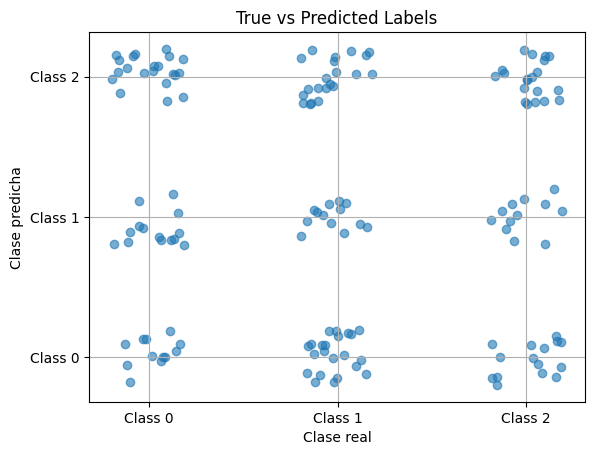

In [ ]:
# Gráficos:
import matplotlib.pyplot as plt
true_labels = np.argmax(y_test, axis=1)
plt.scatter(true_labels + np.random.uniform(-0.2, 0.2, size=true_labels.shape),
            predicted_labels + np.random.uniform(-0.2, 0.2, size=predicted_labels.shape),
            alpha=0.6)  # Adding alpha for transparency

plt.xlabel('Clase real')
plt.ylabel('Clase predicha')
plt.title('True vs Predicted Labels')
plt.xticks(np.arange(num_clases), labels=[f'Class {i}' for i in range(num_clases)])  # Optional: Set xticks as class labels
plt.yticks(np.arange(num_clases), labels=[f'Class {i}' for i in range(num_clases)])  # Optional: Set yticks as class labels
plt.grid(True)
plt.show()

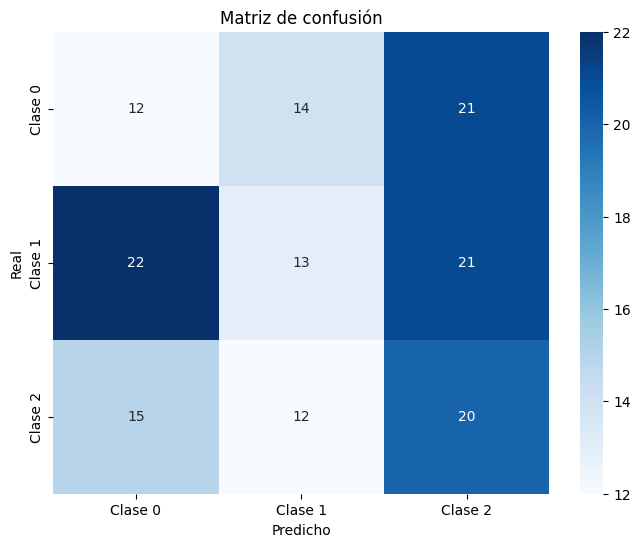

In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Clase {i}' for i in range(num_clases)],
            yticklabels=[f'Clase {i}' for i in range(num_clases)])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

Es el modelo bueno?

## 2. Ejemplo de regresión con MLP

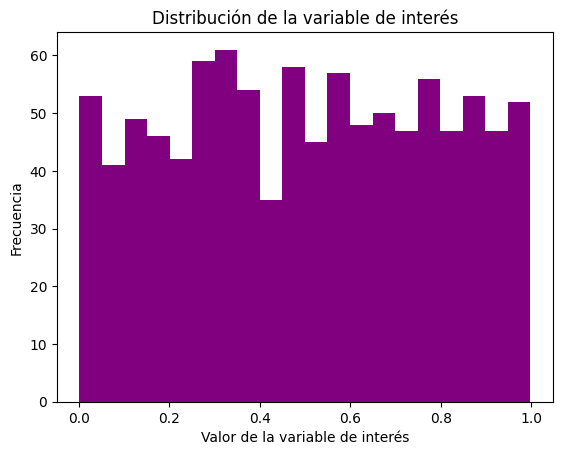

In [19]:
# Generación de datos:
# Features
X = np.random.rand(num_muestras, num_variables)
# Target values
y = np.random.rand(num_muestras)

# Distribución de la variable de interés
plt.hist(y, bins=20,  color="purple")
plt.xlabel('Valor de la variable de interés')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de interés')
plt.show()

In [20]:
# Separación de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print(len(y_train), len(y_val), len(y_test))

700 150 150


Modelo:

In [21]:

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(num_variables,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])



# Nueva forma con más flexibilidad
from tensorflow.keras.optimizers import SGD
custom_lr = 0.001 # Tasa de aprendizaje
optimizer = SGD(learning_rate=custom_lr)

model.compile(optimizer=optimizer,
              loss='mean_squared_error', # error cuadrático medio
              metrics=['mean_squared_error'])


¿Podemos poner más unidades en la última capa? ¿Por qué sí/no?

In [22]:
# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1971 - mean_squared_error: 0.1971 - val_loss: 0.1524 - val_mean_squared_error: 0.1524
Epoch 2/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1556 - mean_squared_error: 0.1556 - val_loss: 0.1220 - val_mean_squared_error: 0.1220
Epoch 3/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1323 - mean_squared_error: 0.1323 - val_loss: 0.1040 - val_mean_squared_error: 0.1040
Epoch 4/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1162 - mean_squared_error: 0.1162 - val_loss: 0.0935 - val_mean_squared_error: 0.0935
Epoch 5/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1083 - mean_squared_error: 0.1083 - val_loss: 0.0876 - val_mean_squared_error: 0.0876
Epoch 6/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0952 - mean_squared_error: 0.0952 - val_loss: 0.0844 - val_mean_squared_error: 0.0844
Epoch 7/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0919 - mean_squared_error: 0.0919 - val_loss: 0.0828 - val_mean

Gráficos de entrenamiento

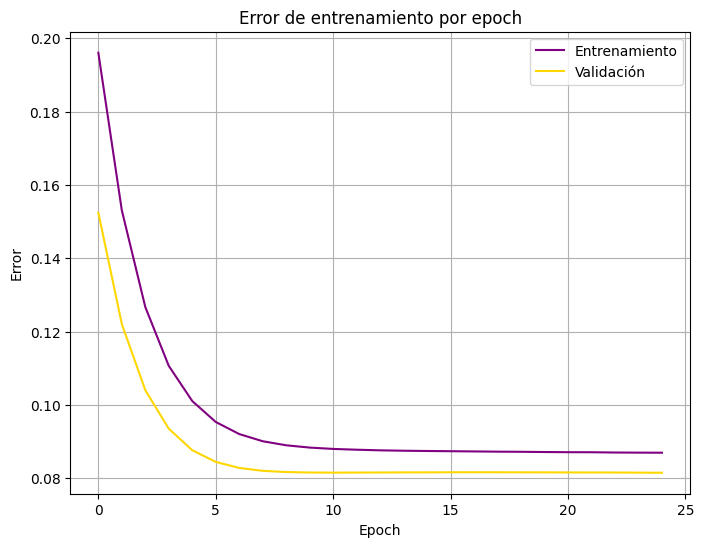

In [23]:
# Access training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(train_loss,  label='Entrenamiento', c = "purple")
plt.plot(val_loss, label='Validación', c = "gold")
plt.title('Error de entrenamiento por epoch')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

Evaluación del modelo

In [24]:
# Evaluate the model
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest MSE: {test_mse}')


5/5 - 0s - 8ms/step - loss: 0.0850 - mean_squared_error: 0.0850

Test MSE: 0.08504779636859894


Comparación de predicción vs real

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


<ipython-input-25-778b0bba6f4f>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1.25], [0, 1.25], 'k--', linewidth=2, label='Línea identidad', c="red")


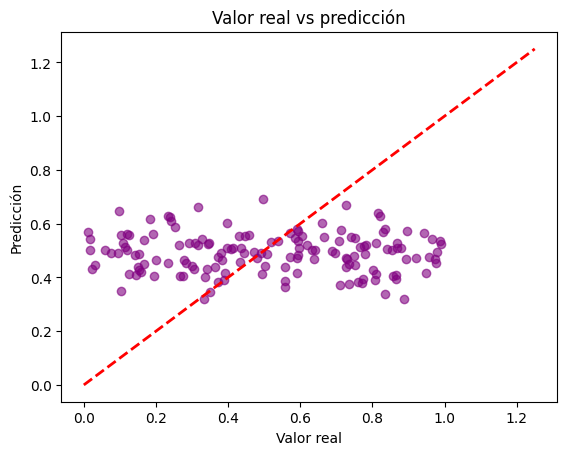

In [25]:
predictions = model.predict(X_test)
plt.scatter(y_test, predictions, alpha=0.6, c="purple")
plt.xlabel('Valor real')
# Línea identidad
plt.plot([0, 1.25], [0, 1.25], 'k--', linewidth=2, label='Línea identidad', c="red")
plt.xlabel('Valor real')
# Leyendas
plt.ylabel('Predicción')
plt.title('Valor real vs predicción')
plt.show()


¿Es buena la predicción?

## 3. Ejercicio

Ver el efecto de los siguientes cambios (hacerlos por separado para observar los cambios de manera aislada)
1. Cambio de función de pérdida a MeanAbsolutePercentageError
2. Cambio de función de optimización a Adam/SGD
3. Cambio de funciones de activación de relu a tanh o leaky_relu
4. Añadir más capas
5. Cambio de tasa de aprendizaje
6. Entrenar por 100 epochs
7. Batch size de menor tamaño

In [27]:
from keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD


model = keras.Sequential([
    layers.Dense(64, activation='tanh', input_shape=(num_variables,)),
    layers.Dense(32, activation='tanh'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(16, activation='tanh'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(1)
])



# Nueva forma con más flexibilidad

custom_lr = 0.0005 # Tasa de aprendizaje
optimizer = Adam(learning_rate=custom_lr)

model.compile(optimizer=optimizer,
              loss='MeanAbsolutePercentageError', # error cuadrático medio
              metrics=['mean_squared_error'])
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_val, y_val))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 123.5391 - mean_squared_error: 0.2863 - val_loss: 144.5557 - val_mean_squared_error: 0.3575
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 103.5014 - mean_squared_error: 0.2588 - val_loss: 147.4373 - val_mean_squared_error: 0.2101
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 138.2642 - mean_squared_error: 0.2399 - val_loss: 192.7644 - val_mean_squared_error: 0.1555
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 147.9640 - mean_squared_error: 0.3016 - val_loss: 127.1339 - val_mean_squared_error: 0.3072
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 112.0414 - mean_squared_error: 0.2795 - val_loss: 125.8491 - val_mean_squared_error: 0.2389
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 105.7347 - mean_squared_error: 0.3001 - val_loss: 150.3592 - val_mean_squared_error: 0.3649
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 136.3051 - mean_squared_error: 0.3

##4. Modelo con datos públicos:

#### Análisis de precios de vivienda de California

Es un conjunto de datos de **regresión**  con 20640 muestras con 8 variables cada una.

* **Variable objetivo:** el valor medio de las viviendas en los distritos de California, en dólares.

Las 8 características de entrada son las siguientes:

1. MedInc: ingreso medio en el grupo de bloques
2. HouseAge: edad media de las viviendas en el grupo de bloques
3. AveRooms: número medio de habitaciones por hogar
4. AveBedrms: número medio de dormitorios por hogar
5. Population: población del grupo de bloques
6. AveOccup: número medio de miembros del hogar
7. Latitude: latitud del grupo de bloques
8. Longitude: longitud del grupo de bloques

Este conjunto de datos se derivó del censo de los EE. UU. de 1990, utilizando una fila por grupo de bloques del censo. Un grupo de bloques es la unidad geográfica más pequeña para la que la Oficina del Censo de los EE. UU. publica datos de muestra (un grupo de bloques normalmente tiene una población de 600 a 3000 personas).

Un hogar es un grupo de personas que residen en una casa. Dado que el número promedio de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores sorprendentemente grandes para grupos de bloques con pocos hogares y muchas casas vacías, como los complejos turísticos.

In [2]:
# Leer los datos
from sklearn.datasets import fetch_california_housing
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data = fetch_california_housing()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1234
)
# Dividir en test y validation el segundo set
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size=0.5, random_state=1234
)

(14448, 8)
(3096, 8)
(3096, 8)
Nombres de las variables: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Distribuciones de los datos                   0             1             2             3             4  \
count  14448.000000  14448.000000  14448.000000  14448.000000  14448.000000   
mean       3.874572     28.630122      5.430545      1.095834   1420.738926   
std        1.913645     12.543691      2.159799      0.394598   1123.260086   
min        0.499900      1.000000      0.888889      0.333333      3.000000   
25%        2.556800     18.000000      4.440716      1.006420    788.000000   
50%        3.531300     29.000000      5.233333      1.048780   1168.000000   
75%        4.750000     37.000000      6.055987      1.099458   1726.000000   
max       15.000100     52.000000     62.422222     15.312500  35682.000000   

                  5             6             7  
count  14448.000000  14448.000000  14448.000000  
mean

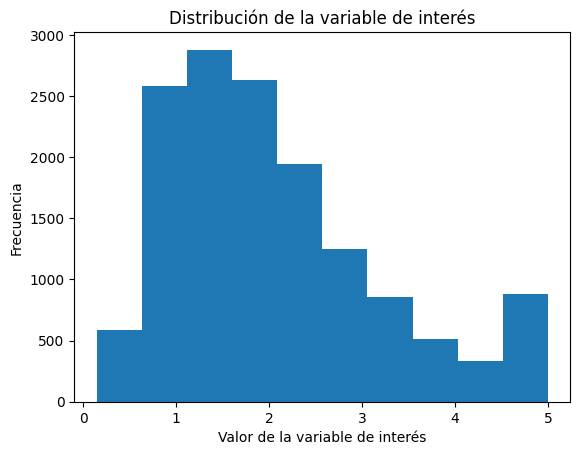

In [4]:
# Explorar datos
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
feature_names = data.feature_names
print("Nombres de las variables:", feature_names)
print("Distribuciones de los datos", pd.DataFrame(X_train).describe())
plt.hist(y_train)
plt.xlabel('Valor de la variable de interés')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de interés')
plt.show()

Notas algo que se deba realizar a estos datos?

Preparacion de los datos

In [5]:
from sklearn.preprocessing import StandardScaler # normal 0, 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val= scaler.transform(X_val)


Modelado

In [6]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=[keras.metrics.RootMeanSquaredError(), 'mean_absolute_percentage_error'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6814 - mean_absolute_percentage_error: 48.9598 - root_mean_squared_error: 2.4863 - val_loss: 0.6150 - val_mean_absolute_percentage_error: 38.1386 - val_root_mean_squared_error: 0.7842
Epoch 2/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.9861 - mean_absolute_percentage_error: 46.6719 - root_mean_squared_error: 2.7504 - val_loss: 0.6392 - val_mean_absolute_percentage_error: 41.1262 - val_root_mean_squared_error: 0.7995
Epoch 3/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7167 - mean_absolute_percentage_error: 35.6591 - root_mean_squared_error: 0.8443 - val_loss: 0.4664 - val_mean_absolute_percentage_error: 31.9440 - val_root_mean_squared_error: 0.6829
Epoch 4/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4703 - mean_absolute_percentage_error: 29.1643 - root_mean_squared_error: 0.6855 - val_loss: 0.4377 - val_mean_absolute_percentage_error: 27.6215 - val_root_mean_squared_error: 0.6616
Epoch 5/100

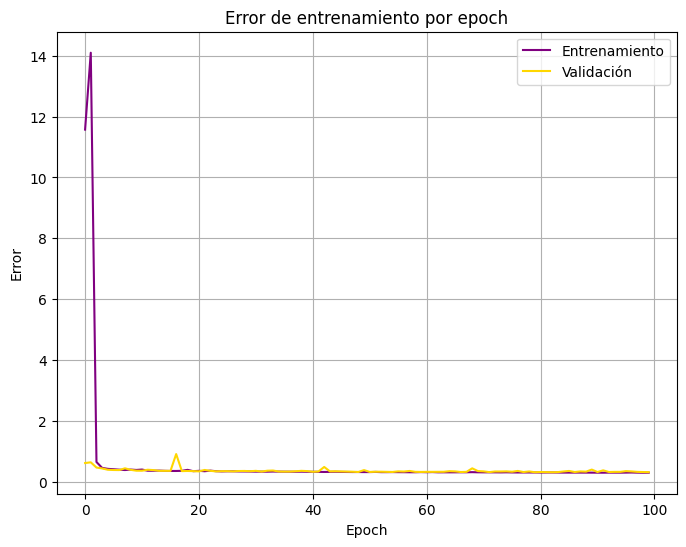

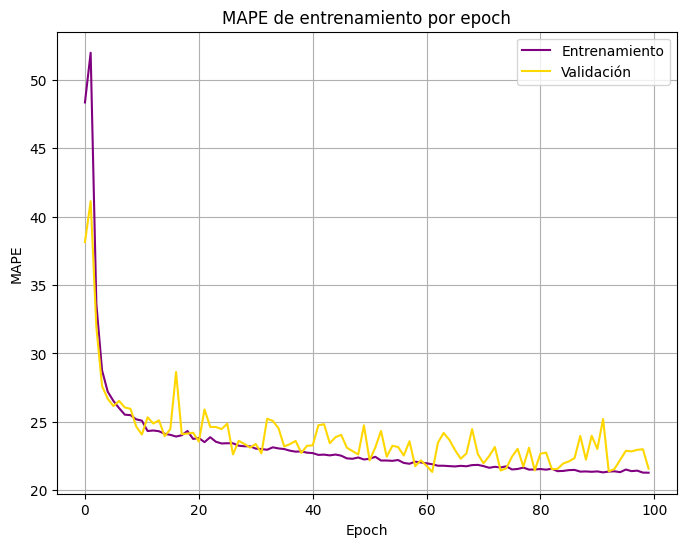

In [8]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mape = history.history['mean_absolute_percentage_error']
val_mape = history.history['val_mean_absolute_percentage_error']

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(train_loss,  label='Entrenamiento', c = "purple")
plt.plot(val_loss, label='Validación', c = "gold")
plt.title('Error de entrenamiento por epoch')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()



plt.figure(figsize=(8, 6))
plt.plot(train_mape,  label='Entrenamiento', c = "purple")
plt.plot(val_mape, label='Validación', c = "gold")
plt.title('MAPE de entrenamiento por epoch')
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R-cuadrado: {r2}')


test_loss, test_mape, test_rmse = model.evaluate(X_test, y_test, verbose=2)


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R-cuadrado: 0.7654290140114925
97/97 - 0s - 3ms/step - loss: 0.3193 - mean_absolute_percentage_error: 21.3363 - root_mean_squared_error: 0.5651


Son las métricas distintas?

Predice un caso con las siguientes características:

* 'MedInc': 5
* 'HouseAge': 10
* 'AveRooms': 4
* 'AveBedrms': 2
* 'Population': 1000
* 'AveOccup': 3
* 'Latitude': 37.88
* 'Longitude': -122.23

Respuesta correcta: Alrededor de 2.9


In [13]:
nuevo_caso = np.array([[5, 10, 4, 2, 1000, 3, 37.88, -122.23]])
# Estandarizacion
nuevo_caso = scaler.transform(nuevo_caso)
print(nuevo_caso)
model.predict(nuevo_caso)


[[ 0.58812737 -1.48526991 -0.66237392  2.29143789 -0.37458242 -0.00760411
   1.04757778 -1.32839906]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[2.4633236]], dtype=float32)

#### Guardar el modelo
Hay dos formas de guardar el modelo:
1. Completo (mucho más pesado): Incluye arquitectura, pesos y estado del optimizador
2. Solo los pesos (más liviano): Útil si se desea experimentar con diferentes arquitecturas utilizando los mismos pesos preentrenados.

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# Guardar
model.save('model.h5')
# Volver a cargar en el ambiente un modelo guardado
from tensorflow.keras.models import load_model
model = load_model('model.h5')

# Guardar solo pesos
model.save_weights('model.weights.h5')
# Cargar solo los pesos
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.load_weights('model.weights.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Sobre reiniciar los modelos y guardar progreso:
- Es buena práctica guardar los resultados intermedios cuando se corren modelos por muchos epochs en caso de que algo falle. Estos se llaman "checkpoints"

In [19]:
# Ejemplo de código de entrenamiento con checkpoints:
from tensorflow.keras.callbacks import ModelCheckpoint

# Se crea un callback:
checkpoint_callback = ModelCheckpoint(
    filepath='checkpoint.model.keras',  # Directorio para guardarlo
    save_weights_only=False,
    save_freq='epoch', # guardar cuando cada epoch finaliza
    verbose=1
)

# Entrenamiento con callback
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=[keras.metrics.RootMeanSquaredError(), 'mean_absolute_percentage_error'])
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint_callback]
)


Epoch 1/10
449/452 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2853 - mean_absolute_percentage_error: 20.4849 - root_mean_squared_error: 0.5340
Epoch 1: saving model to checkpoint.model.keras
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2854 - mean_absolute_percentage_error: 20.4924 - root_mean_squared_error: 0.5342 - val_loss: 0.3240 - val_mean_absolute_percentage_error: 21.2420 - val_root_mean_squared_error: 0.5692
Epoch 2/10
433/452 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2885 - mean_absolute_percentage_error: 21.1180 - root_mean_squared_error: 0.5370
Epoch 2: saving model to checkpoint.model.keras
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2889 - mean_absolute_percentage_error: 21.1293 - root_mean_squared_error: 0.5374 - val_loss: 0.3224 - val_mean_absolute_percentage_error: 22.0466 - val_root_mean_squared_error: 0.5678
Epoch 3/10
448/452 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3048 - mean_absolute_percentage_error: 21.4544 - root_mean_squared_error: 0.5519
Epoch

In [20]:
# Cargar checkpoint
keras.models.load_model('checkpoint.model.keras')


<Sequential name=sequential_1, built=True>

**Uso de GPU**

Una CPU, o unidad central de procesamiento, es un componente de hardware que es la unidad computacional principal en un servidor. Se encarga de todo tipo de tareas informáticas necesarias para que el sistema operativo y las aplicaciones se ejecuten. Una unidad de procesamiento gráfico (GPU) es un componente de hardware similar, pero más especializado. Puede manejar de manera más eficiente operaciones matemáticas complejas que se ejecutan en paralelo que una CPU general. Si bien las GPU se crearon inicialmente para manejar tareas de renderización de gráficos en juegos y animación, sus usos ahora se extienden mucho más allá de eso.

Las GPU se destacan en el procesamiento en paralelo a través de varios núcleos o unidades lógicas aritméticas (ALU). Los núcleos de GPU son menos potentes que los núcleos de CPU y tienen menos memoria. Mientras que las CPU pueden cambiar rápidamente entre diferentes conjuntos de instrucciones, una GPU simplemente toma un gran volumen de las mismas instrucciones y las procesa a alta velocidad. Como resultado, las funciones de GPU desempeñan un papel importante en la computación paralela.

In [ ]:
import time
from tensorflow import keras
import tensorflow as tf
import numpy as np

# Disponibilidad de GPU
print("Numero GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Datos sintéticos
def generate_large_data(num_samples=1000000, input_dim=30, num_classes=10):
    x_train = np.random.rand(num_samples, input_dim).astype('float32')
    y_train = np.random.randint(0, num_classes, num_samples)
    x_test = np.random.rand(int(num_samples * 0.1), input_dim).astype('float32')
    y_test = np.random.randint(0, num_classes, int(num_samples * 0.1))
    return (x_train, y_train), (x_test, y_test)

# Red neuronal
def build_large_model(input_dim=30, num_classes=10):
    model = keras.Sequential([
        keras.layers.Dense(1024, activation='relu', input_shape=(input_dim,)),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Entrenamiento midiendo tiempo
def train_model(device, x_train, y_train, x_test, y_test):
    with tf.device(device):
        model = build_large_model()
        start_time = time.time()
        history = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))
        end_time = time.time()
        duration = end_time - start_time
    return duration, history.history['val_accuracy'][-1]

# Prueba
(x_train, y_train), (x_test, y_test) = generate_large_data()
print(len(x_train))

# # Entrenamiento en CPU
# cpu_device = '/device:CPU:0'
# keras.backend.clear_session()
# print("\nTraining on CPU...")
# cpu_time, cpu_acc = train_model(cpu_device, x_train, y_train, x_test, y_test)
# print(f"CPU Training Time: {cpu_time:.2f} seconds")
# print(f"CPU Validation Accuracy: {cpu_acc:.4f}")

# Entrenamiendo en GPU
gpu_device = '/device:GPU:0'
keras.backend.clear_session()
print("Training on GPU...")
gpu_time, gpu_acc = train_model(gpu_device, x_train, y_train, x_test, y_test)
print(f"GPU Training Time: {gpu_time:.2f} seconds")
print(f"GPU Validation Accuracy: {gpu_acc:.4f}")

# Numero GPUs Available:  1
# 1000000
# Training on GPU...
# Epoch 1/5
# 31250/31250 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - accuracy: 0.0999 - loss: 2.3032 - val_accuracy: 0.0994 - val_loss: 2.3027
# Epoch 2/5
# 31250/31250 ━━━━━━━━━━━━━━━━━━━━ 75s 2ms/step - accuracy: 0.0994 - loss: 2.3027 - val_accuracy: 0.0997 - val_loss: 2.3026
# Epoch 3/5
# 31250/31250 ━━━━━━━━━━━━━━━━━━━━ 91s 3ms/step - accuracy: 0.1003 - loss: 2.3027 - val_accuracy: 0.0991 - val_loss: 2.3028


# Numero GPUs Available:  0
# 1000000
# Training on GPU...
# /usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
#   super().__init__(activity_regularizer=activity_regularizer, **kwargs)
# Epoch 1/3
# 31250/31250 ━━━━━━━━━━━━━━━━━━━━ 440s 14ms/step - accuracy: 0.1001 - loss: 2.3031 - val_accuracy: 0.0989 - val_loss: 2.3027


Numero GPUs Available:  1
1000000
Training on GPU...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 76s 2ms/step - accuracy: 0.1009 - loss: 2.3031 - val_accuracy: 0.0988 - val_loss: 2.3027
Epoch 2/3
22502/31250 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.1003 - loss: 2.3027

- Que pasa si lo corremos sin activar GPU?
- Siempre nos darán los mismos resultados una red neuronal?
